# Credit Risk Modeling

### What is credit risk?

A credit risk is the **risk of default** on a debt that may arise from a borrower failing to make required payments. In the first resort, the risk is that of the lender and includes lost principal and interest, disruption to cash flows, and increased collection costs. The loss may be complete or partial. In an efficient market, higher levels of credit risk will be associated with higher borrowing costs.

Losses can arise in a number of circumstances. For example:

- A consumer may fail to make a payment due on a mortgage loan, credit card, line of credit, or other loan.
- A company is unable to repay asset-secured fixed or floating charge debt.
- A business or consumer does not pay a trade invoice when due.
- A business does not pay an employee's earned wages when due.
- A business or government bond issuer does not make a payment on a coupon or principal payment when due.
- An insolvent insurance company does not pay a policy obligation.
- An insolvent bank won't return funds to a depositor.
- A government grants bankruptcy protection to an insolvent consumer or business.

To reduce the lender's credit risk:

- the lender may perform a credit check on the prospective borrower
- may require the borrower to take out appropriate insurance, such as mortgage insurance, or 
- seek security over some assets of the borrower or a guarantee from a third party. 

The lender can also take out insurance against the risk or on-sell the debt to another company. In general, the higher the risk, the higher will be the interest rate that the debtor will be asked to pay on the debt. Credit risk mainly arises when borrowers are unable to pay due willingly or unwillingly.

Re-iterating credit risk:

- Credit risk refers to the risk that a borrower may not repay a loan and that the lender may lose the principal of the loan or the interest associated with it. (Eg: Failure to pay back mortgages, credit cards, personal loans, etc)

- Higher credit risk equates to higher borrowing costs.

For a lender(eg: bank), it is of paramount importance to assess credit risk of the borrower. 


source: [wikipedia](https://en.wikipedia.org/wiki/Credit_risk), [investopedia](http://www.investopedia.com/terms/c/creditrisk.asp), [Datacamp Course using R](https://www.datacamp.com/courses/introduction-to-credit-risk-modeling-in-r)

# Problem Statement

XYZ Bank wants to build a credit risk model for its personal loan division. XYZ has given personal loans before and has historical data about the customers and knows whether the loan defaulted or not. If the loan had defaulted, the amount defaulted was recorded.

It wants you to build a credit risk model for its bankers.

It will use it to determine whether to provide loan to applicants or not.

# Approach

A very typical approach is to estimate the following two metrics for every applicant:

`Probability of Default`: What is the probability that the applicant will default, if given the loan

`Loss Given Default`: If the applicant defaults on the loan, what will be loss incurred by the bank?

For the purpose of this model, Bank XYZ has asked you to ignore cash flows from interest and other costs incurred by the bank for processing and maintaining the loan and use only the data provided in the data. 

# Data

You are provided with the following data:

**train_creditRisk.csv**  
This is the historical data that the bank has provided. It has the following columns

`loan_amnt` : Amount of Loan provided to the applicant  
`int_rate`: Interest rate charged for the applicant  
`grade`:  Employment Grade of the applicant  
`emp_length`: Number of years the applicant has been employed  
`home_ownership`: Whether the applicant owns a house or not  
`annual_inc`:  Annual income of the applicant  
`age`: Age of the applicant  
`default` : Whether the applicant has defaulted or not (target variable)  
`default_amount`:  What was the loan amount that was defaulted (target variable)

**testFeatures_creditRisk.csv**  
This dataset has the features of the applicants that you need to score and provide *probability of default* and *loss given default* metrics. It has the same set of columns as the train dataset, except the `default` and `default_amount` columns.


**testLabels_creditRisk.csv**  
This has the target columns of the test dataset. Once the model has been finalized, the accuracy of the model is found out by comparing the predictions against the actual. 

# Loading the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load the training dataset
train = pd.read_csv("data/train_creditRisk.csv")

In [3]:
#View the first few rows of train
train.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,16500,12.18,B,8.0,OWN,75000.0,24,0,0
1,2000,NaN,A,1.0,RENT,33000.0,22,0,0
2,15000,15.99,D,14.0,MORTGAGE,40000.0,22,1,8792
3,5000,5.79,A,9.0,MORTGAGE,50000.0,25,0,0
4,8700,14.61,D,4.0,RENT,28320.0,28,0,0


In [4]:
#View the columns of the train dataset
train.columns

Index(['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'age', 'default', 'default_amount'],
      dtype='object')

In [5]:
#View the data types of the train dataset
train.dtypes

loan_amnt           int64
int_rate          float64
grade              object
emp_length        float64
home_ownership     object
annual_inc        float64
age                 int64
default             int64
default_amount      int64
dtype: object

In [6]:
#View summary of train 
train.describe()

,loan_amnt,int_rate,emp_length,annual_inc,age,default,default_amount
count,21819.000000,19727.000000,21223.000000,2.181900e+04,21819.000000,21819.000000,21819.000000
mean,9580.417297,11.004751,6.151015,6.689969e+04,27.691416,0.110913,513.267336
std,6314.643803,3.238828,6.669942,6.399031e+04,6.257452,0.314031,1839.302702
min,500.000000,5.420000,0.000000,4.000000e+03,20.000000,0.000000,0.000000
25%,5000.000000,7.900000,2.000000,3.999600e+04,23.000000,0.000000,0.000000
50%,8000.000000,10.990000,4.000000,5.647200e+04,26.000000,0.000000,0.000000
75%,12137.500000,13.470000,8.000000,8.000000e+04,30.000000,0.000000,0.000000
max,35000.000000,23.220000,62.000000,6.000000e+06,144.000000,1.000000,22565.000000


# Data Pre-processing

We will do the following two data pre-processing before building our first set of models.

1. handle missing values  
2. handle categorical variables

#### Missing values

In [7]:
#Find if train has missing values.
# There is a isnull() function
train.isnull().head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
#The above is kinda hard to comprehend. 
#It tells if every single element is null or not
#What we want first is to find if a column has missing values or not
#let's find that first
train.isnull().any()

loan_amnt         False
int_rate           True
grade             False
emp_length         True
home_ownership    False
annual_inc        False
age               False
default           False
default_amount    False
dtype: bool

In [9]:
#One consideration we check here is the number of observations with missing 
#values for those columns that have missing values
#If a column has too many missing values, it might make sense 
#to drop the column.
#let's see how many missing values are present
train.isnull().sum()

loan_amnt            0
int_rate          2092
grade                0
emp_length         596
home_ownership       0
annual_inc           0
age                  0
default              0
default_amount       0
dtype: int64

In [10]:
#So, we see that two columns have missing values. : int_rate and emp_length
#Both the columns are numeric. 
#Let's replace missing values with the mean of the column

In [11]:
train.mean()

loan_amnt          9580.417297
int_rate             11.004751
emp_length            6.151015
annual_inc        66899.691265
age                  27.691416
default               0.110913
default_amount      513.267336
dtype: float64

In [12]:
#there's a fillna function
train = train.fillna(train.mean())

In [13]:
#Now, let's check if train has missing values or not
train.isnull().any()

loan_amnt         False
int_rate          False
grade             False
emp_length        False
home_ownership    False
annual_inc        False
age               False
default           False
default_amount    False
dtype: bool

#### Categorical variables

In [14]:
#We will use sklearn's LabelEncoder function

from sklearn.preprocessing import LabelEncoder

In [15]:
#Replace grade and home_ownership with the labelEncoder

In [16]:
train[["grade", "home_ownership"]] =  train[["grade", "home_ownership"]].apply(LabelEncoder().fit_transform)

In [17]:
#Look at train to check if it worked fine
train.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,16500,12.180000,1,8.0,2,75000.0,24,0,0
1,2000,11.004751,0,1.0,3,33000.0,22,0,0
2,15000,15.990000,3,14.0,0,40000.0,22,1,8792
3,5000,5.790000,0,9.0,0,50000.0,25,0,0
4,8700,14.610000,3,4.0,3,28320.0,28,0,0


In [18]:
#check at the types
train.dtypes

loan_amnt           int64
int_rate          float64
grade               int64
emp_length        float64
home_ownership      int64
annual_inc        float64
age                 int64
default             int64
default_amount      int64
dtype: object

In [19]:
#We are good to build our first model
#But before that, let's do some exploratory data analysis

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

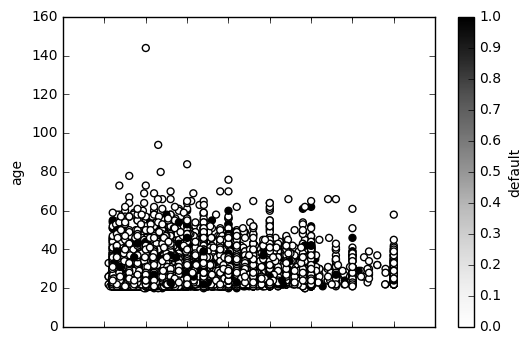

In [21]:
#Let's do scatter plot of loan amount, age and default. What do you infer?
train.plot.scatter(x="loan_amnt", y="age", c="default", s=25)

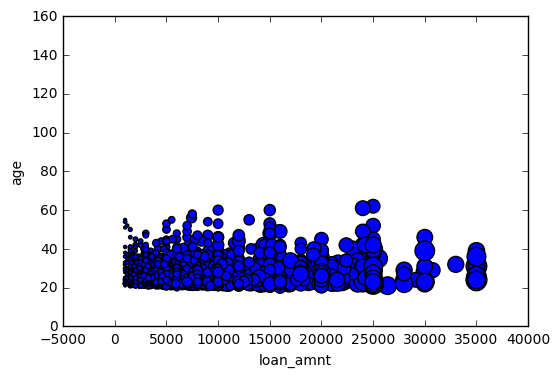

In [22]:
#How about doing the same for default amount.What do you infer?
train.plot.scatter(x="loan_amnt", y="age", s=train["default_amount"]*0.01)

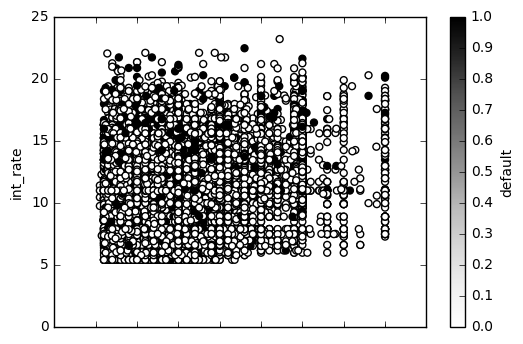

In [23]:
#Let's do scatter plot of loan amount, int_rate and default.What do you infer?
train.plot.scatter(x="loan_amnt", y="int_rate", c="default", s=25)

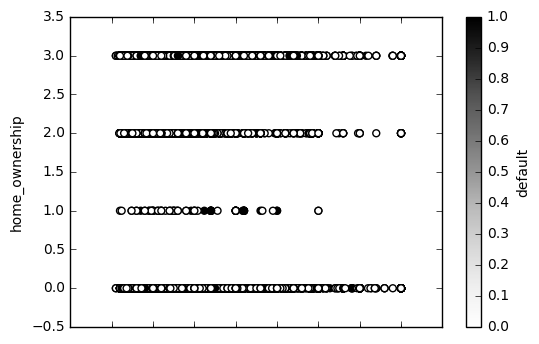

In [24]:
#Let's do scatter plot of loan amount, home ownership and default.What do you infer?
train.plot.scatter(x="loan_amnt", y="home_ownership", c="default", s=25)

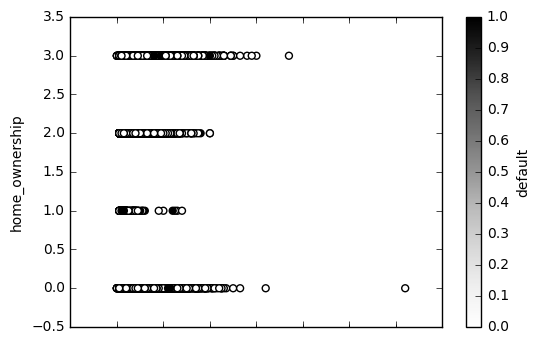

In [25]:
#Let's do scatter plot of age, home ownership and default.What do you infer?
train.plot.scatter(x="age", y="home_ownership", c="default", s=25)

In [26]:
#Feature engineering will help. We will cover this later.
#For now, let's use the given dataset and create our first set of models

# Task 1: `Probability of Default`

# First model: Benchmark

In [27]:
#Analyze the proportion of defaults in the training dataset
train.default.value_counts()

0    19399
1     2420
Name: default, dtype: int64

In [28]:
#Proportion of defaults:
print("Percentage of defaults in the training dataset:") 
train.default.value_counts()[1]/train.shape[0]*100

Percentage of defaults in the training dataset:


11.091250744763737

In [29]:
#What is the benchmark model? 

**Predict everything to be NOT DEFAULT**

In [30]:
#What's the accuracy of the benchmark model?
print("Benchmark accuracy:")
100 - train.default.value_counts()[1]/train.shape[0]*100

Benchmark accuracy:


88.908749255236259

In [31]:
#Let's see if we can build something better than this

# Second Model: Linear Regression (OLS)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#instantiate the model
model2 = LinearRegression()

In [34]:
#fit the model
model2.fit(train.iloc[:,:7], train.iloc[:,7])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#View parameters of the model
model2.coef_

array([ -1.16976939e-06,   5.87533528e-03,   2.76326162e-02,
         8.82398598e-04,   2.82443622e-03,  -1.94626419e-07,
        -6.54889816e-04])

In [36]:
model2.intercept_

0.044888977163242028

**Exercise**

In [37]:
#Can you now tell the equation of the model?


In [38]:
#The right thing is to score it on the test dataset and determine the accuracy.
#For now, let's cheat a bit and score on train dataset and evaluate accuracy
#We will verify on test once we get a handle on model training

In [60]:
#score on train
model2_prediction = model2.predict(train.iloc[:,:7])

In [61]:
np.min(model2_prediction), np.max(model2_prediction)

(-1.0823754813358164, 0.32708746495243668)

In [66]:
#There are two challenges with linear regression
#The values are not bounded between 0 and 1. 
#Second is that - the values we get aren't probability. 
#So, one way to score it is to set everything above a particular threshold to be 1
#plot to observe the threshold

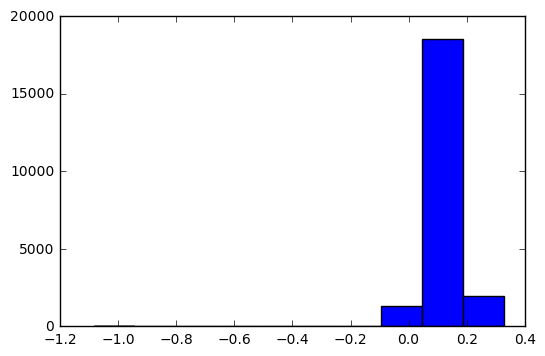

In [67]:
plt.hist(model2_prediction)
plt.show()

In [68]:
#Let's take everything above 0.2 to be 1(default) and rest as 0 (not default)

In [69]:
#use 0.2 threshold to set prediction to 0 or 1
model2_prediction[model2_prediction>0.2] = 1
model2_prediction[model2_prediction <= 0.2] = 0

In [70]:
#What's the accuracy of the model?
#We will build the accuracy from scratch here. 
#Going forward we will use sklearn's in-built method

In [71]:
#accuracy of the model
predictions = pd.concat([pd.Series(model2_prediction), train.iloc[:,7]], axis=1)

In [72]:
predictions.columns = ["predicted", "actual"]

In [73]:
predictions.head()

,predicted,actual
0,0.0,0
1,0.0,0
2,0.0,1
3,0.0,0
4,0.0,0


In [74]:
#Find if prediction and actual are the same
predictions.predicted == predictions.actual

0         True
1         True
2        False
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15       False
16       False
17        True
18        True
19        True
20       False
21        True
22        True
23        True
24        True
25       False
26       False
27        True
28        True
29       False
         ...  
21789     True
21790     True
21791     True
21792     True
21793     True
21794    False
21795     True
21796     True
21797     True
21798     True
21799     True
21800     True
21801     True
21802     True
21803    False
21804     True
21805     True
21806     True
21807     True
21808     True
21809     True
21810     True
21811     True
21812     True
21813     True
21814     True
21815     True
21816     True
21817     True
21818     True
dtype: bool

In [75]:
#Find the count of occurences where prediction and actual are same
np.sum(predictions.predicted == predictions.actual)

18800

In [76]:
#Divide the above metric by the total rows
print("Accuracy from Linear Regression Model:")
np.sum(predictions.predicted == predictions.actual)/predictions.shape[0]*100

Accuracy from Linear Regression Model:


86.163435537834005

In [77]:
#Doesn't look like it was any better than the benchmark !

# Model 3: Linear Regression (some refinement)

let's now play with some parameters on the linear regression model and check if model shows any improvement

In [78]:
# One obvious thing to do is the normalize the columns
# Discuss why !

In [79]:
model3 = LinearRegression(normalize=True)

In [80]:
model3.fit(train.iloc[:,:7], train.iloc[:,7])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [81]:
model3_prediction = model3.predict(train.iloc[:,:7])

In [82]:
#For predicted, set everything above 0.5 to 1 and rest to 0
model3_prediction[model3_prediction>0.2] = 1
model3_prediction[model3_prediction<=0.2] = 0

In [83]:
predictions = pd.DataFrame({"predicted":model3_prediction, 
                            "actual":train.iloc[:,7]})

In [84]:
predictions.head()

,actual,predicted
0,0,0.0
1,0,0.0
2,1,0.0
3,0,0.0
4,0,0.0


In [85]:
#Let's use accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(predictions.actual, predictions.predicted)

0.86163435537833999

In [ ]:
#Again - no improvements over the benchmark


In [87]:
#One way to improve would be to check what the threshold could be?
#But that's on train (remember: that would be cheating!).
#May not generalize to new (unseen) data.
#While the model is simple, it has its disadvantages

In [88]:
#Let's now try logistic regression

# Model 4: Logistic Regresion (Default:L2)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model4 = LogisticRegression()

In [91]:
model4.fit(train.iloc[:,:7], train.iloc[:,7])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
#Predict on train
model4_prediction = model4.predict(train.iloc[:,:7]) 

In [93]:
#Do we need to do threshold here? Discuss/prove why we need or why we don't need

In [94]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model4_prediction})

In [95]:
predictions.head()

,actual,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [96]:
accuracy_score(predictions.actual, predictions.predicted)

0.88908749255236263

In [97]:
#Still no improvement !

#  Model 5: Logistic Regression (L1)

In [98]:
model5 = LogisticRegression(penalty="l1")

In [99]:
model5.fit(train.iloc[:,:7], train.iloc[:,7])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
#predict on train
model5_prediction = model5.predict(train.iloc[:,:7])

In [101]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model5_prediction})

In [102]:
predictions.head()

,actual,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [103]:
accuracy_score(predictions.actual, predictions.predicted)

0.88908749255236263

# Other accuracy metrics

So far, we have seen accuracy score. Now, let's check for other metrics

- auc
- precision
- recall
- F-score

In [104]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [108]:
predictions.predicted.value_counts()

0    21819
Name: predicted, dtype: int64

In [ ]:
#This won't work!
precision_score(predictions.actual, predictions.predicted)

In [109]:
recall_score(predictions.actual, predictions.predicted)

0.0

In [111]:
#this will fail too!
f1_score(predictions.actual, predictions.predicted)

In [112]:
#To compute auc, we need probability
model5_prob_prediction = model5.predict_proba(train.iloc[:,:7])

In [113]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model5_prob_prediction[:,1]})

In [114]:
roc_auc_score(predictions.actual, predictions.predicted)

0.65666978659119768

# Model 6: Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
model6 = RandomForestClassifier(400, max_depth=4, oob_score=True)

In [117]:
model6.fit(train.iloc[:,:7], train.iloc[:,7])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [118]:
model6.oob_score_

0.88908749255236263

In [119]:
model6_prediction = model6.predict(train.iloc[:,:7])

In [120]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model6_prediction})

In [121]:
accuracy_score(predictions.actual, predictions.predicted)

0.88908749255236263

# Model 7: Gradient Boosting Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
model7 = GradientBoostingClassifier(n_estimators=400, 
                                    subsample=0.7,
                                    max_depth=4)

In [124]:
model7.fit(train.iloc[:,:7], train.iloc[:,7])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=None,
              subsample=0.7, verbose=0, warm_start=False)

In [125]:
model7_prediction = model7.predict(train.iloc[:,:7])

In [126]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model7_prediction})

In [127]:
accuracy_score(predictions.actual, predictions.predicted)

0.90214950272698102

# Accuracy on test dataset

Let's now score the test dataset on all the models and check which model is good.

Let's check two metrics: accuracy_score and auc

In [128]:
X_test = pd.read_csv("data/testFeatures_creditRisk.csv")
y_test = pd.read_csv("data/testLabels_creditRisk.csv")

In [132]:
X_test.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
0,5275,12.53,C,0.0,RENT,50000.0,31
1,25000,11.49,B,8.0,MORTGAGE,51000.0,29
2,10000,8.63,A,2.0,RENT,30000.0,31
3,10000,10.95,B,0.0,RENT,50000.0,26
4,3000,11.83,B,2.0,RENT,72000.0,30


In [137]:
X_test[["grade", "home_ownership"]] =  X_test[["grade", "home_ownership"]].apply(LabelEncoder().fit_transform)

In [140]:
X_test = X_test.fillna(X_test.mean())

In [141]:
X_test.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
0,5275,12.53,2,0.0,3,50000.0,31
1,25000,11.49,1,8.0,0,51000.0,29
2,10000,8.63,0,2.0,3,30000.0,31
3,10000,10.95,1,0.0,3,50000.0,26
4,3000,11.83,1,2.0,3,72000.0,30


In [131]:
y_test.head()

,default,default_amount
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [135]:
# Model 1: Benchmark
model1_prediction = np.repeat([0], X_test.shape[0])

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model1_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))
print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))

Accuracy Score
0.889041660938
auc
0.5


In [151]:
# Model 2: :Linear Regression

model2_prediction = model2.predict(X_test)

model2_prediction[model2_prediction>0.2] = 1
model2_prediction[model2_prediction <= 0.2] = 0

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model2_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))
print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))

Accuracy Score
0.859067784958
auc
0.528149435557


In [153]:
# Model 3: Linear Regression

model3_prediction = model3.predict(X_test)

model3_prediction[model3_prediction>0.2] = 1
model3_prediction[model3_prediction <= 0.2] = 0

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model3_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))
print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))


Accuracy Score
0.859067784958
auc
0.528149435557


In [154]:
# Model 4: Logistic Regression (L2)

model4_prediction = model4.predict(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model4_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))

model4_prediction = model4.predict_proba(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model4_prediction[:,1]})


print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))


Accuracy Score
0.889041660938
auc
0.556485913736


In [155]:
# Model 5: Logistic Regression (L1)

model5_prediction = model5.predict(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model5_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))

model5_prediction = model5.predict_proba(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model5_prediction[:,1]})


print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))


Accuracy Score
0.889041660938
auc
0.643219264164


In [156]:
# Model 6: Random Forest

model6_prediction = model6.predict(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model6_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))

model6_prediction = model6.predict_proba(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model6_prediction[:,1]})


print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))


Accuracy Score
0.889041660938
auc
0.648316654727


In [157]:
# Model 7: Gradient Boosting

model7_prediction = model7.predict(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model7_prediction})

print("Accuracy Score")
print(accuracy_score(predictions.actual, predictions.predicted))

model7_prediction = model7.predict_proba(X_test)

predictions = pd.DataFrame({"actual":y_test.iloc[:,0],
                           "predicted":model7_prediction[:,1]})


print("auc")
print(roc_auc_score(predictions.actual, predictions.predicted))


Accuracy Score
0.885054310463
auc
0.627601013556


### What do we learn from this?

- Choose the right metric for the problem
- Here, accuracy score isn't very helpful. 
- For the end-user, it makes sense to know probability
- So, we need to select the model that provides best discrimination on probability
- `auc` a better metric
- Based on that, L1-LogisticRegression or RandomForest are good choices
- How do we improve this? There are two options: a) More features b) Feature Engineering